<a href="https://colab.research.google.com/github/canilkumar/audio-classification/blob/master/Call_Recordings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** Refer to [Streamlit](https://canilkumar-audio-classification-finite-sample-gnvvse.streamlitapp.com/)

**Note:** Refer to https://canilkumar-audio-classification-finite-sample-gnvvse.streamlitapp.com

# Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/18_completecalls.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CALL_RECORDINGS    446 non-null    object
 1   DAILY_CHARGES      446 non-null    object
 2   MONTHLY_CHARGES    446 non-null    object
 3   EX_1               446 non-null    object
 4   EX_2               446 non-null    object
 5   EX_3               446 non-null    object
 6   EX_4               446 non-null    object
 7   EX_5               446 non-null    object
 8   EX_6               446 non-null    object
 9   EX_7               446 non-null    object
 10  EX_8               446 non-null    object
 11  EX_9               446 non-null    object
 12  EX_10              446 non-null    object
 13  EX_11              446 non-null    object
 14  CLAIM              446 non-null    object
 15  CUSTOMER_RESPONSE  446 non-null    object
dtypes: object(16)
memory usage: 55.9+ KB


In [ ]:
df = pd.read_excel("/content/18_completecalls.xlsx",index_col='CALL_RECORDINGS')
df.head()

,DAILY_CHARGES,MONTHLY_CHARGES,EX_1,EX_2,EX_3,EX_4,EX_5,EX_6,EX_7,EX_8,EX_9,EX_10,EX_11,CLAIM,CUSTOMER_RESPONSE
CALL_RECORDINGS,,,,,,,,,,,,,,,
20220727-132651_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-132955_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133326_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133529_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133649_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
df.describe()

,Sr. #,MONTHLY CHARGES,EXCLUSION(1-11),CUSTOMER RESPONSE
count,799.000000,0.0,0.0,0.0
mean,400.000000,NaN,NaN,NaN
std,230.795725,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,200.500000,NaN,NaN,NaN
50%,400.000000,NaN,NaN,NaN
75%,599.500000,NaN,NaN,NaN
max,799.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 20220727-132651_Test16_03224907891 to 20220728-001853_Test2_03237233766
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DAILY CHARGES      446 non-null    object
 1   MONTHLY CHARGES    446 non-null    object
 2   EX_1               446 non-null    object
 3   EX_2               446 non-null    object
 4   EX_3               446 non-null    object
 5   EX_4               446 non-null    object
 6   EX_5               446 non-null    object
 7   EX_6               446 non-null    object
 8   EX_7               446 non-null    object
 9   EX_8               446 non-null    object
 10  EX_9               446 non-null    object
 11  EX_10              446 non-null    object
 12  EX_11              446 non-null    object
 13  CLAIM              446 non-null    object
 14  CUSTOMER RESPONSE  446 non-null    object
dtypes: object(15)
memory usage: 55.8+

In [ ]:
df = df.drop(['DAILY_CHARGES','MONTHLY_CHARGES', 'CLAIM', 'CUSTOMER_RESPONSE'], axis = 1)
df.head()

,EX_1,EX_2,EX_3,EX_4,EX_5,EX_6,EX_7,EX_8,EX_9,EX_10,EX_11
CALL_RECORDINGS,,,,,,,,,,,
20220727-132651_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-132955_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133326_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133529_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
20220727-133649_Test16_03224907891,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
df.tail()

,Sr. #,DAILY CHARGES,CLAIM
CALL RECORDIGS,,,
20220720-144934_Test16_03209074133-all,795,1,No
20220720-145024_Test16_03209074133-all,796,1,No
20220720-145105_Test16_03209074133-all,797,1,No
20220720-145148_Test16_03209074133-all,798,0,No
20220720-145244_Test16_03209074133-all,799,1,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DAILY_CHARGES'] = le.fit_transform(df['DAILY_CHARGES'])
df['MONTHLY_CHARGES'] = le.fit_transform(df['MONTHLY_CHARGES'])
df['CLAIM'] = le.fit_transform(df['CLAIM'])
df['CUSTOMER_RESPONSE'] = le.fit_transform(df['CUSTOMER_RESPONSE'])
df['EX_1'] = le.fit_transform(df['EX_1'])
df['EX_2'] = le.fit_transform(df['EX_2'])
df['EX_3'] = le.fit_transform(df['EX_3'])
df['EX_4'] = le.fit_transform(df['EX_4'])
df['EX_5'] = le.fit_transform(df['EX_5'])
df['EX_6'] = le.fit_transform(df['EX_6'])
df['EX_7'] = le.fit_transform(df['EX_7'])
df['EX_8'] = le.fit_transform(df['EX_8'])
df['EX_9'] = le.fit_transform(df['EX_9'])
df['EX_10'] = le.fit_transform(df['EX_10'])
df['EX_11'] = le.fit_transform(df['EX_11'])
df.head()

,DAILY_CHARGES,MONTHLY_CHARGES,EX_1,EX_2,EX_3,EX_4,EX_5,EX_6,EX_7,EX_8,EX_9,EX_10,EX_11,CLAIM,CUSTOMER_RESPONSE
CALL_RECORDINGS,,,,,,,,,,,,,,,
20220727-132651_Test16_03224907891,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20220727-132955_Test16_03224907891,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20220727-133326_Test16_03224907891,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20220727-133529_Test16_03224907891,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20220727-133649_Test16_03224907891,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.tail()

,EX_1,EX_2,EX_3,EX_4,EX_5,EX_6,EX_7,EX_8,EX_9,EX_10,EX_11
CALL_RECORDINGS,,,,,,,,,,,
20220728-000941_Test2_03237233766,0,0,0,0,0,0,0,0,0,0,0
20220728-001212_Test2_03237233766,0,0,0,0,0,0,0,0,0,0,0
20220728-001403_Test2_03237233766,0,0,0,0,0,0,0,0,0,0,0
20220728-001650_Test2_03237233766,0,0,0,0,0,0,0,0,0,0,0
20220728-001853_Test2_03237233766,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
df.loc['20220727-133529_Test16_03224907891']

EX_1     1
EX_2     1
EX_3     1
EX_4     1
EX_5     1
EX_6     1
EX_7     1
EX_8     1
EX_9     1
EX_10    1
EX_11    1
Name: 20220727-133529_Test16_03224907891, dtype: int64

In [ ]:
df.columns

Index(['DAILY_CHARGES', 'MONTHLY_CHARGES', 'EX_1', 'EX_2', 'EX_3', 'EX_4',
       'EX_5', 'EX_6', 'EX_7', 'EX_8', 'EX_9', 'EX_10', 'EX_11', 'CLAIM',
       'CUSTOMER_RESPONSE'],
      dtype='object')

# load the data from excel sheet and then saved to which folder do you want

In [ ]:
import os
import shutil
input_base_path='/content/drive/MyDrive/18-08-2022'
customer_no_path='/content/drive/MyDrive/Monthly_Pricing_1/No'
customer_yes_path='/content/drive/MyDrive/Monthly_Pricing_1/Yes'
for path in os.listdir(input_base_path):
  name, ext = os.path.splitext(path)
  newName=(name.replace('-all',''))
  exist=newName in df.index
  if(exist):
    print(df.loc[newName]["MONTHLY_CHARGES"])
    if( df.loc[newName]["MONTHLY_CHARGES"] == 1):
      shutil.copy(input_base_path+"/"+path,customer_yes_path)
    else:
      shutil.copy(input_base_path+"/"+path,customer_no_path)
   
    

  

1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1


In [ ]:
!7z x /content/01-08-2022 Consent Denied-20220802T120445Z-001.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,40 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   
ERROR: No more files
/content/01-08-2022



System ERROR:
Unknown error -2147024872


In [ ]:
df.columns

Index(['Sr. #', 'MONTHLY CHARGES', 'CUSTOMER RESPONSE'], dtype='object')

In [ ]:
import IPython.display as ipd
sa = ipd.Audio('/content/drive/MyDrive/Audio_wav/No/01_-_Jampanduve.wav')
sa

# unzipping the file

In [ ]:
!sudo cp -v -r "/content/drive/MyDrive/Exclusions_1/No//" "/content/drive/MyDrive/Daily_Pricing/No"

In [ ]:
# unzip training data
from zipfile import ZipFile
file_name = "/content/18-08-2022 Complete Calls-20220819T124526Z-001.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
audio_files = os.listdir('/content/drive/MyDrive/Folder_1/No')
# Folder is having audio files of both MP3 and WAV formats'
print(len(audio_files))

41


In [ ]:
import os
audio_files = os.listdir('/content/drive/MyDrive/Monthly_Pricing_1/No')
# Folder is having audio files of both MP3 and WAV formats'
print(len(audio_files))

1491


In [ ]:
import os
audio_files = os.listdir('/content/drive/MyDrive/Monthly_Pricing_1/Yes')
# Folder is having audio files of both MP3 and WAV formats'
print(len(audio_files))

4568


In [ ]:
import os
audio_files = os.listdir('/content/drive/MyDrive/Monthly_Pricing_1/Yes')
# Folder is having audio files of both MP3 and WAV formats'
print(len(audio_files))

4226


# Convert .mp3 files to.wav format

In [ ]:
#### Convert .mp3 files to .wav format
import os
import shutil
from pydub import AudioSegment

path = "/content/18-08-2022 Complete Calls"
outputPath='/content/drive/MyDrive/18-08-2022/'

#Change working directory
os.chdir(path)

audio_files = os.listdir()

# You dont need the number of files in the folder, just iterate over them directly using:
for file in audio_files:
    #spliting the file into the name and the extension
    name, ext = os.path.splitext(file)
    if ext == ".mp3":
       mp3_sound = AudioSegment.from_mp3(file)
       #rename them using the old name + ".wav"
       outPut = "{0}.wav".format(name)
       mp3_sound.export(outputPath+""+outPut, format="wav")
       

In [ ]:
mypaths = ['/content/18-08-2022 Complete Calls']

In [ ]:
import shutil, os
for mypath in mypaths:
  for filename in os.listdir(mypath):
    f = os.path.join(mypath, filename)
    # Checking if it is a file
    if os.path.isfile(f):
       input_file = mypath + "/" + filename
       print(input_file)
       shutil.copy(input_file, '/content/drive/MyDrive/18-08-2022 complete calls')

/content/18-08-2022 Complete Calls/20220727-155215_Test16_03224907891-all.mp3
/content/18-08-2022 Complete Calls/20220727-202724_Test1_03201457768-all.mp3
/content/18-08-2022 Complete Calls/20220727-201034_Test1_03201457768-all.mp3
/content/18-08-2022 Complete Calls/20220727-150252_Test16_03224907891-all.mp3
/content/18-08-2022 Complete Calls/20220727-193221_Test3_3214342417-all.mp3
/content/18-08-2022 Complete Calls/20220727-134939_Test21_03214062930-all.mp3
/content/18-08-2022 Complete Calls/20220727-193545_Test3_3214342417-all.mp3
/content/18-08-2022 Complete Calls/20220727-221308_Test3_3214342417-all.mp3
/content/18-08-2022 Complete Calls/20220727-222310_Test2_03237233766-all.mp3
/content/18-08-2022 Complete Calls/20220727-191923_Test1_03201457768-all.mp3
/content/18-08-2022 Complete Calls/20220727-205818_Test3_3214342417-all.mp3
/content/18-08-2022 Complete Calls/20220727-114355_Test14_03234330635-all.mp3
/content/18-08-2022 Complete Calls/20220727-222113_Test2_03237233766-all.mp3

In [ ]:
import shutil, os
for mypath in myPaths:
 for filename in os.listdir(mypath):
    f = os.path.join(mypath, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        input_file = mypath+"/"+filename
        print(input_file)
        shutil.copy(input_file, '/content/drive/MyDrive/Customer_Response_1/No')

/content/drive/MyDrive/02-08-2022/20220726-120930_1015_03204176957-all.wav
/content/drive/MyDrive/02-08-2022/20220726-120149_Test9_03051365232-all.wav
/content/drive/MyDrive/02-08-2022/20220726-152822_1015_03051365232-all.wav
/content/drive/MyDrive/02-08-2022/20220726-162135_Test11_03224907891-all.wav
/content/drive/MyDrive/02-08-2022/20220726-111132_Test9_03051365232-all.wav
/content/drive/MyDrive/02-08-2022/20220726-152453_Test22_03234863885-all.wav
/content/drive/MyDrive/02-08-2022/20220726-141732_Test22_03217983191-all.wav
/content/drive/MyDrive/02-08-2022/20220726-153051_1015_03051365232-all.wav
/content/drive/MyDrive/02-08-2022/20220726-215333_Test12_3224907891-all.wav
/content/drive/MyDrive/02-08-2022/20220726-144135_1015_03051365232-all.wav
/content/drive/MyDrive/02-08-2022/20220726-150956_Test22_03234863885-all.wav
/content/drive/MyDrive/02-08-2022/20220726-121508_1015_03204176957-all.wav
/content/drive/MyDrive/02-08-2022/20220726-141938_Test22_03217983191-all.wav
/content/dri

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from pydub import AudioSegment

audio_files = os.listdir('/content/25-07-2022')
# Folder is having audio files of both MP3 and WAV formats
len_audio=len(audio_files)
for i in range (len_audio):
    if os.path.splitext(audio_files[i])[1] == ".mp3":
       mp3_sound = AudioSegment.from_mp3(audio_files[i])
       mp3_sound.export("<path>\\converted.wav", format="wav")

In [ ]:
len(audio_files)


872

In [ ]:
# import required modules
from os import path
from pydub import AudioSegment
# Assign files

input_file = "/content/drive/MyDrive/02-08-2022/20220726-121907_1015_03204176957-all.wav"
o = "/content/drive/MyDrive/ex_11/Yes/20220726-121907_1015_03204176957-all.wav"
# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(o, format = "wav")

<_io.BufferedRandom name='/content/drive/MyDrive/ex_11/Yes/20220726-121907_1015_03204176957-all.wav'>

In [ ]:
# import required modules
from os import path
from pydub import AudioSegment
# Assign files

input_file = "/content/drive/MyDrive/04-08-2022/20220720-145457_1003_3018620301-all.wav"
o = "/content/drive/MyDrive/Claim_Process/No/20220720-145457_1003_3018620301-all.wav"

# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(o, format = "wav")

<_io.BufferedRandom name='/content/drive/MyDrive/Claim_Process/No/20220720-145457_1003_3018620301-all.wav'>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# import required modules
from os import path
from pydub import AudioSegment
# Assign files

input_file = "/content/drive/MyDrive/04-08-2022/20220720-145411_1003_3018620301-all.wav"
o = "/content/drive/MyDrive/Claim_Process/Yes/20220720-145411_1003_3018620301-all.wav"

# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(o, format = "wav")

<_io.BufferedRandom name='/content/drive/MyDrive/Claim_Process/Yes/20220720-145411_1003_3018620301-all.wav'>

In [ ]:
import os
audio_files = os.listdir('/content/drive/MyDrive/11-08-2022')
# Folder is having audio files of both MP3 and WAV formats'
len_audio=len(audio_files)
print(len(audio_files))

379


# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
import glob
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
train_audio_path = '/content/drive/MyDrive/Monthly_Pricing_1'

In [ ]:
#@title
train_audio_path = '/content/drive/MyDrive/Customer_response'

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(train_audio_path+'/Yes/20220324-115011_1004_3234863885-all.wav')
plt.figure(figsize=(15, 5))

#librosa.display.waveplot is used to plot waveform of amplitude vs time
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()


In [ ]:
ipd.Audio(data, rate=sampling_rate)

In [ ]:
labels = os.listdir(train_audio_path)
print(labels)

['No', 'Yes']


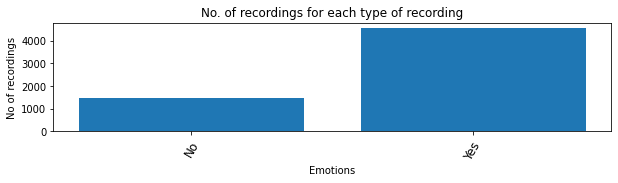

In [ ]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#bar plot
plt.figure(figsize=(10,2))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Emotions', fontsize=10)
plt.ylabel('No of recordings', fontsize=10)
plt.xticks(index, labels, fontsize=12, rotation=60)
plt.title('No. of recordings for each type of recording')
plt.show()

In [ ]:
pip install wavio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


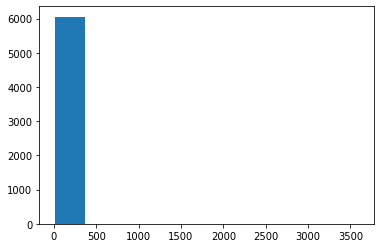

In [ ]:
import wavio

duration_of_recordings = []

for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]   
    for wav in waves:
        wav = wavio.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(wav.data)/wav.rate))

plt.hist(np.array(duration_of_recordings))
plt.show()

In [ ]:
def extract_feature(file_name):
      X, sample_rate = librosa.load(file_name)
      feature = np.array([])
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      features = np.hstack((feature, mfccs))
      return features

In [ ]:
 # The below process is going to take some time
 %%time
all_wave = []
all_label = []

for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        file_path = train_audio_path + '/' + label + '/' + wav
        features = extract_feature(file_path)
        all_wave.append(features)
        all_label.append(label)

# Reshape the 2D array to 3D since the input to the conv1d must be a 3D array
all_wave = np.array(all_wave).reshape(-1, 40, 1)
print("Shape of the features: ", all_wave.shape)

No
Yes
Shape of the features:  (6059, 40, 1)


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes=len(labels))

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% of the train data and 20% of the validate data
x_train, x_val, y_train, y_val = train_test_split(all_wave, y, test_size = 0.2, shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4847, 40, 1), (1212, 40, 1), (4847, 2), (1212, 2))

In [ ]:


import keras
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
import tensorflow as tf

model = keras.Sequential()
model.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(128, kernel_size=(10), activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 31, 64)            704       
                                                                 
 conv1d_13 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 2, 128)            0         
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                      

In [ ]:
# Define the loss function to be categorical cross-entropy since it is a multi-classification problem
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and evaluate the performance on the validation set
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
152/152 [==============================] - 6s 37ms/step - loss: 0.6845 - accuracy: 0.7143 - val_loss: 0.5147 - val_accuracy: 0.7517
Epoch 2/50
152/152 [==============================] - 5s 33ms/step - loss: 0.5346 - accuracy: 0.7543 - val_loss: 0.5029 - val_accuracy: 0.7583
Epoch 3/50
152/152 [==============================] - 5s 33ms/step - loss: 0.5151 - accuracy: 0.7605 - val_loss: 0.4997 - val_accuracy: 0.7723
Epoch 4/50
152/152 [==============================] - 5s 30ms/step - loss: 0.4990 - accuracy: 0.7671 - val_loss: 0.4811 - val_accuracy: 0.7715
Epoch 5/50
152/152 [==============================] - 5s 33ms/step - loss: 0.4854 - accuracy: 0.7718 - val_loss: 0.4662 - val_accuracy: 0.7748
Epoch 6/50
152/152 [==============================] - 5s 30ms/step - loss: 0.4849 - accuracy: 0.7788 - val_loss: 0.4679 - val_accuracy: 0.7822
Epoch 7/50
152/152 [==============================] - 4s 30ms/step - loss: 0.4621 - accuracy: 0.7898 - val_loss: 0.4543 - val_accuracy: 0.7814

# Vizualize the performance of the model over a period of time

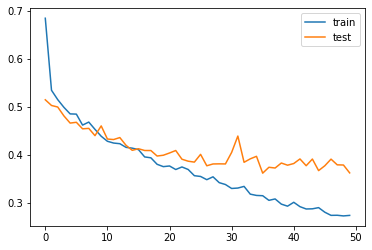

In [ ]:
# Vizualize the performance of the model over a period of time
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Store the model in the form of .h5

In [ ]:
model.save("/content/drive/MyDrive/models/Monthly_Pricing_6.h5")

In [ ]:
# The below function predicts emotion for the given audio
def predict(audio):
    prob=model.predict(audio.reshape(1,40,1))
    index=np.argmax(prob[0])
    #return classes[index]
    return (classes[index],np.amax(prob[0]))

In [ ]:
# Thew below function predicts emotion for the given audio
def predict(audio):
    prob = model.predict(audio.reshape(1,40,1))
    index = np.argmax(prob[0])
    # return classes[index]
    return (classes[index],np.amax(prob[0]))

In [ ]:
# The below function predicts emotion for the given audio
def predict(audio):
    prob = model.predict(audio.reshape(1,40,1))
    index = np.argmax(prob[0])
    # return classes[index]
    return (classes[index], np.amax(prob[0]))

In [ ]:
test_sample1 = "/content/drive/MyDrive/Customer_Response/No/20220225-123343_1003_3344117804-all.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

Model Prediction:  ('No', 0.88200706)


In [ ]:
test_sample1 = "/content/drive/MyDrive/Daily_Monthly_val/20220426-111740_1003_3344117804-all.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

In [ ]:
test_sample1 = "/content/drive/MyDrive/Daily_Monthly_val/20220426-152725_1003_3344117804-all.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

In [ ]:
test_sample1 = "/content/drive/MyDrive/models/20220413-115820_1004_03234863885-all.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

In [ ]:
test_sample1 = "/content/drive/MyDrive/models/20220412-122417_1004_3234863885-all.wav"
data, sampling_rate = librosa.load(test_sample1)
prediction = predict(extract_feature(test_sample1))
print("Model Prediction: ", prediction)
ipd.Audio(data, rate = sampling_rate)

In [ ]:
pip install noisereduce

In [ ]:
pip install wave

In [ ]:
import wave
from scipy.io import wavfile

In [ ]:
import noisereduce as nr
# load data
rate, data = wavfile.read("/content/drive/MyDrive/Insurance_Exclusion/No/20220322-121740_1004_3234863885-all.wav")
# select section of data that is noise
noisy_part = data[10000:15000]
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data, noise_clip=noisy_part, verbose=True)